# RUN

## LIBRARY 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import cv2
import os
import zipfile
import glob as gb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau , ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet ,preprocess_input
from keras.applications.efficientnet import EfficientNetB0

## FUNCTION

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

## CODE

In [ ]:
!nvidia-smi

Sun Oct 23 14:03:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    29W /  70W |   9016MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
### extractiing and reading data
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/GEMASTIK/pest_img.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
### Check if already extracted
!ls pest

test  train


In [ ]:
### get to know the data :
for dirpath, dirname, filename in os.walk('pest'):
  print(f"There are {len(dirname)} directories and {len(filename)} image in '{dirpath}'.")

There are 2 directories and 0 image in 'pest'.
There are 9 directories and 0 image in 'pest/test'.
There are 0 directories and 50 image in 'pest/test/mosquito'.
There are 0 directories and 50 image in 'pest/test/sawfly'.
There are 0 directories and 50 image in 'pest/test/mites'.
There are 0 directories and 50 image in 'pest/test/beetle'.
There are 0 directories and 50 image in 'pest/test/bollworm'.
There are 0 directories and 50 image in 'pest/test/aphids'.
There are 0 directories and 50 image in 'pest/test/armyworm'.
There are 0 directories and 50 image in 'pest/test/grasshopper'.
There are 0 directories and 50 image in 'pest/test/stem_borer'.
There are 9 directories and 0 image in 'pest/train'.
There are 0 directories and 300 image in 'pest/train/mosquito'.
There are 0 directories and 300 image in 'pest/train/sawfly'.
There are 0 directories and 300 image in 'pest/train/mites'.
There are 0 directories and 300 image in 'pest/train/beetle'.
There are 0 directories and 300 image in 'pes

In [ ]:
dir_ = []
target = []
for dirpath, _, __ in os.walk('pest'):
  if dirpath[5:10] == 'train' and dirpath[10:]!='':
    dir_.append(dirpath[:11])
    target.append(dirpath[11:])

Image shape: (187, 269, 3)


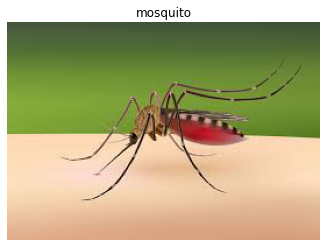

Image shape: (142, 354, 3)


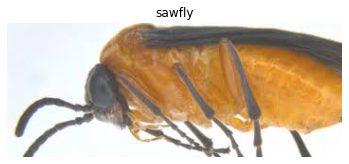

Image shape: (575, 1024, 3)


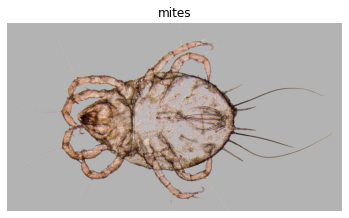

Image shape: (194, 259, 3)


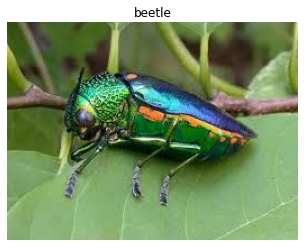

Image shape: (156, 322, 3)


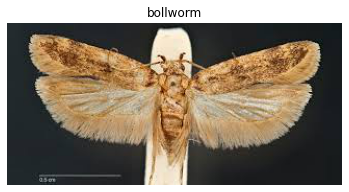

Image shape: (259, 194, 3)


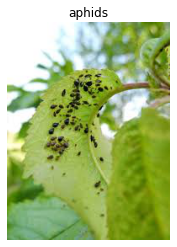

Image shape: (175, 288, 3)


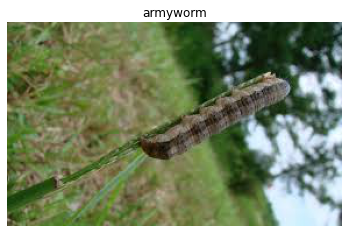

Image shape: (186, 270, 3)


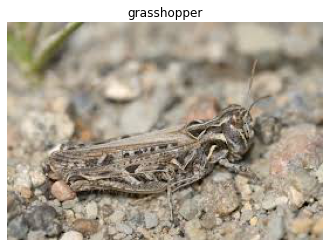

Image shape: (180, 280, 3)


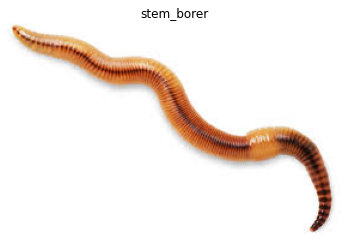

In [ ]:
for i in range(9):
  view_random_image(dir_[i],target[i])
  plt.show()


In [ ]:

# Set the seed
tf.random.set_seed(42)

train_dir = 'pest/train'
test_dir = 'pest/test'


training=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.05,
    
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.05,
    
).flow_from_directory(train_dir,batch_size=16,target_size=(224,224),subset='validation',shuffle=True)

testing=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    
).flow_from_directory(test_dir,batch_size=16,target_size=(224,224),shuffle=True)

Found 2565 images belonging to 9 classes.
Found 135 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


### MOBILE NET

#### MODEL 1

In [ ]:

# Set the seed
tf.random.set_seed(42)

mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))
mobilenet.trainable=False
optimizer=Adam(lr=1e-3,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=1e-8)
callback=[EarlyStop , Reduce_LR]

model_1=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])
model_1.summary()

model_1.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])
# Set the seed
tf.random.set_seed(42)
history_1=model_1.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training)//16,validation_steps=len(validing)//8,
                  callbacks=callback)
loss , acc = model_1.evaluate(testing)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 1024)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               1179776   
                                                                 
 batch_normalization_18 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                      

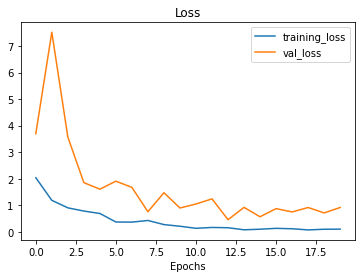

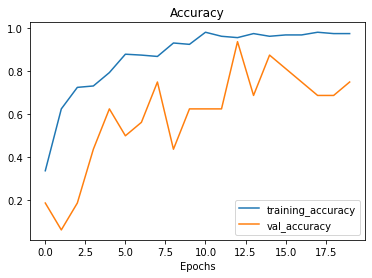

In [ ]:
plot_loss_curves(history_1)

In [ ]:
len(training)//16

10

#### MODEL 2

In [ ]:

# Set the seed
tf.random.set_seed(42)

mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))
mobilenet.trainable=False
optimizer=Adam(lr=1e-3,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=1e-8)
callback=[EarlyStop , Reduce_LR]

model_2=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])
model_2.summary()

model_2.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])
# Set the seed
tf.random.set_seed(42)
history_2=model_2.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training)//16,validation_steps=len(validing)//8,
                  callbacks=callback)
loss , acc = model_2.evaluate(testing)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 1024)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               1179776   
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                      

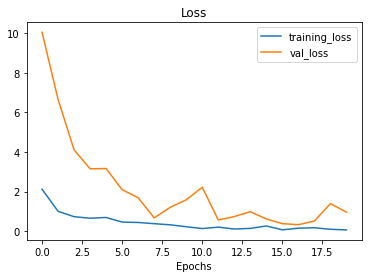

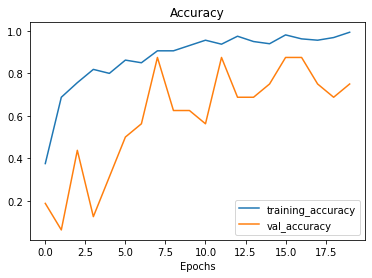

In [ ]:
plot_loss_curves(history_2)

#### MODEL 3

In [ ]:

# Set the seed
tf.random.set_seed(42)

mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))
mobilenet.trainable=False
optimizer=Adam(lr=1e-3,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=1e-8)
callback=[EarlyStop , Reduce_LR]

model_3=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])
model_3.summary()

model_3.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])
# Set the seed
tf.random.set_seed(42)
history_3=model_3.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training)//16,validation_steps=len(validing)//8,
                  callbacks=callback)
loss , acc = model_3.evaluate(testing)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 1024)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               1179776   
                                                                 
 batch_normalization_24 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                      

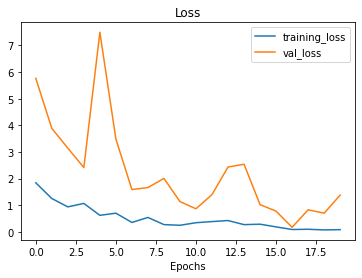

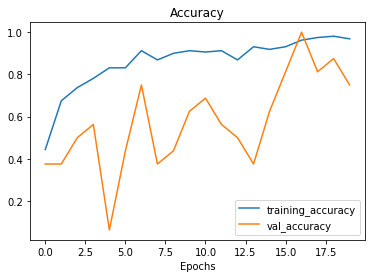

In [ ]:
plot_loss_curves(history_3)

### EFFNET

In [ ]:

# Set the seed
tf.random.set_seed(42)

effnet=EfficientNetB0(include_top=False,weights='imagenet',input_shape=(224,224,3))
effnet.trainable=False
optimizer=Adam(lr=1e-3,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=1e-8)
callback=[EarlyStop , Reduce_LR]

model_1=Sequential([
    effnet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])
model_1.summary()

model_1.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])
# Set the seed
tf.random.set_seed(42)
history_1=model_1.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training)//16,validation_steps=len(validing)//8,
                  callbacks=callback)
loss , acc = model_1.evaluate(testing)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 1280)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 11520)             0         
                                                                 
 dense_36 (Dense)            (None, 128)               1474688   
                                                                 
 batch_normalization_27 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 1024)             

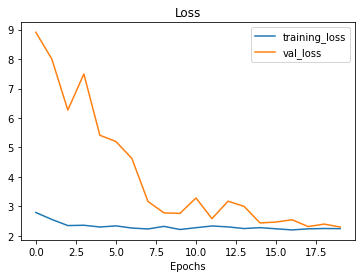

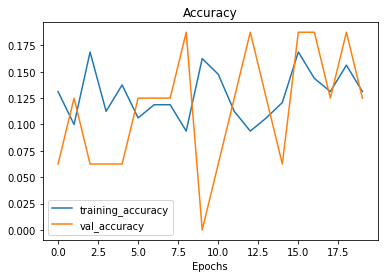

In [ ]:
plot_loss_curves(history_1)

#### MODEL 2

In [ ]:

# Set the seed
tf.random.set_seed(42)

effnet=EfficientNetB0(include_top=False,weights='imagenet',input_shape=(224,224,3))
effnet.trainable=False
optimizer=Adam(lr=1e-3,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=1e-8)
callback=[EarlyStop , Reduce_LR]

model_2=Sequential([
    effnet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])
model_2.summary()

model_2.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])
# Set the seed
tf.random.set_seed(42)
history_2=model_2.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training)//16,validation_steps=len(validing)//8,
                  callbacks=callback)
loss , acc = model_2.evaluate(testing)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 1280)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 11520)             0         
                                                                 
 dense_40 (Dense)            (None, 128)               1474688   
                                                                 
 batch_normalization_30 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 1024)            

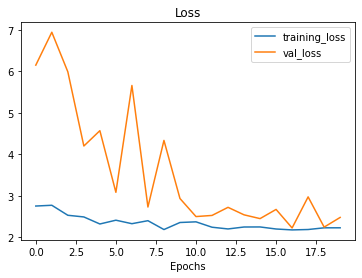

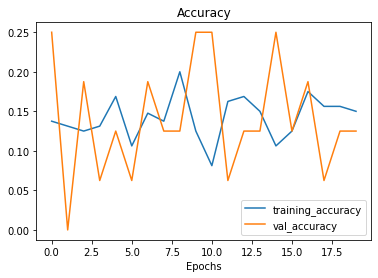

In [ ]:
plot_loss_curves(history_2)

#### MODEL 3

In [ ]:

# Set the seed
tf.random.set_seed(42)

effnet=EfficientNetB0(include_top=False,weights='imagenet',input_shape=(224,224,3))
effnet.trainable=False
optimizer=Adam(lr=1e-3,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=1e-8)
callback=[EarlyStop , Reduce_LR]

model_3=Sequential([
    effnet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(9,activation='softmax')
])
model_3.summary()

model_3.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])
# Set the seed
tf.random.set_seed(42)
history_3=model_3.fit(training,validation_data=validing,epochs=20,batch_size=16,
                  steps_per_epoch=len(training)//16,validation_steps=len(validing)//8,
                  callbacks=callback)
loss , acc = model_3.evaluate(testing)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 1280)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 11520)             0         
                                                                 
 dense_44 (Dense)            (None, 128)               1474688   
                                                                 
 batch_normalization_33 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 1024)            

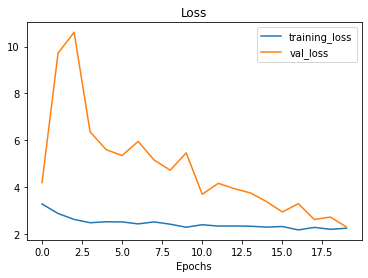

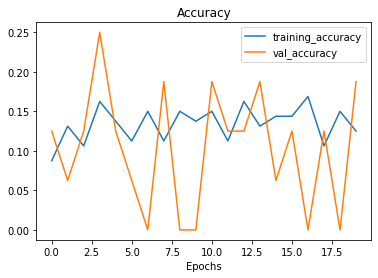

In [ ]:
plot_loss_curves(history_3)